In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pynamicalsys import PlotStyler
from pynamicalsys import ContinuousDynamicalSystem as cds
from pynamicalsys import HamiltonianSystem as HS

In [26]:
time_step = 0.01

In [27]:
E = 1 / 8  # Total energy of the system
x = 0  # Define the initial condition
y = -0.25
py = 0
px = np.sqrt(2 * (E - x**2 * y + y**3 / 3) - x**2 - y**2 - py**2)

dof = 2
q = np.array([x, y])
p = np.array([px, py])

u = np.array([x, y, px, py])

total_time = 10000

In [28]:
ds = cds(model="henon heiles")
ds.integrator("rk4", time_step=time_step)

In [29]:
%%time
lyapunov_spectrum = ds.lyapunov(u, total_time, return_history=True)

CPU times: user 15.7 s, sys: 149 ms, total: 15.8 s
Wall time: 15.9 s


In [30]:
lyapunov_spectrum.shape

(1000001, 5)

In [31]:
lyapunov_spectrum[-1, 1:], lyapunov_spectrum[-1, 1:].sum()

(array([ 0.03787512,  0.00047846, -0.00064519, -0.0377084 ]),
 np.float64(-8.988268462850613e-12))

In [32]:
hs = HS(model="henon heiles")
hs.integrator("svy4", time_step=time_step)

In [33]:
%%time
symp_lyapunov_spectrum = hs.lyapunov(q, p, total_time, return_history=True)

CPU times: user 13.9 s, sys: 72.5 ms, total: 13.9 s
Wall time: 13.9 s


In [34]:
%%time
symp_maximum_lyapunov = hs.lyapunov(q, p, total_time, return_history=True, num_exponents=1)

CPU times: user 3.22 s, sys: 15.7 ms, total: 3.24 s
Wall time: 3.23 s


In [35]:
symp_lyapunov_spectrum[-1, 1:], symp_lyapunov_spectrum[-1, 1:].sum(), symp_maximum_lyapunov[-1, 1]

(array([ 0.05221738,  0.00062833, -0.00079587, -0.05204984]),
 np.float64(4.163336342344337e-17),
 np.float64(0.05213832168306402))

In [36]:
hs.integrator("vv2", time_step=time_step)

In [37]:
%%time
symp_lyapunov_spectrum_vvs = hs.lyapunov(q, p, total_time, return_history=True)

CPU times: user 6.92 s, sys: 41 ms, total: 6.96 s
Wall time: 6.97 s


In [38]:
%%time
symp_maximum_lyapunov_vvs = hs.lyapunov(q, p, total_time, return_history=True, num_exponents=1)

CPU times: user 1.05 s, sys: 5.3 ms, total: 1.06 s
Wall time: 1.05 s


In [39]:
symp_lyapunov_spectrum_vvs[-1, 1:], symp_lyapunov_spectrum_vvs[-1, 1:].sum(), symp_maximum_lyapunov_vvs[-1, 1]

(array([ 0.05976596,  0.00065252, -0.00082032, -0.05959816]),
 np.float64(1.6653345369377348e-16),
 np.float64(0.05968683018507951))

<Figure size 640x480 with 0 Axes>

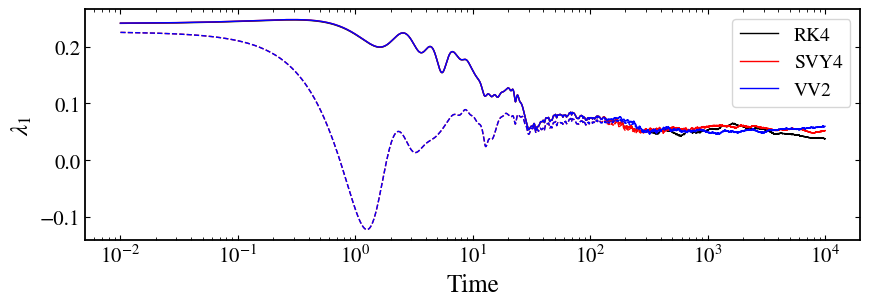

In [40]:
ps = PlotStyler(fontsize=18)
ps.apply_style()

fig, ax = plt.subplots(figsize=(10, 3))

plt.plot(lyapunov_spectrum[:, 0], lyapunov_spectrum[:, 1], "k", label="RK4")

plt.plot(symp_lyapunov_spectrum[:, 0], symp_lyapunov_spectrum[:, 1], "r", label="SVY4")
plt.plot(symp_maximum_lyapunov[:, 0], symp_maximum_lyapunov[:, 1], "r--")

plt.plot(symp_lyapunov_spectrum_vvs[:, 0], symp_lyapunov_spectrum_vvs[:, 1], "b", label="VV2")
plt.plot(symp_maximum_lyapunov_vvs[:, 0], symp_maximum_lyapunov_vvs[:, 1], "b--")

plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel(r"$\lambda_1$")
plt.xscale("log")
# plt.ylim(1e-2, 0.4)
# plt.yscale("log")